In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
from ram.analysis.run_manager import RunManagerGCP
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### List all Strategies available in Storage

In [3]:
RunManagerGCP.get_strategies()

[u'StatArbStrategy2', u'StatArbStrategy', u'LongPeadStrategy']

### List all Runs for specific Strategy in Storage

In [4]:
RunManagerGCP.get_run_names('StatArbStrategy2')

,Run,RunDate,Completed,Description,Starred
0,run_0001,2018-02-15,True,"Smart factor, sector 20",
1,run_0002,2018-02-15,True,"Smart factor, all sectors",
2,run_0003,2018-02-22,True,"New run with smart factor, sector 20",
3,run_0004,2018-02-20,False,"New run with smart factor, sector 25",
4,run_0005,2018-02-20,False,"New run with smart factor, sector 45",


In [20]:
drop_params = [('holding_period', 5), ('holding_period', 7), ('holding_period', 9), ('model', "{u'type': u'reg'}")]

In [21]:
run1 = RunManagerGCP('StatArbStrategy2', 'run_0005', start_year=2011, drop_params=drop_params)
# run1 = RunManagerGCP('StatArbStrategy2', 'run_0002', start_year=2011)

In [22]:
params = run1.analyze_parameters()
params

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,192,0.271052,0.047398,NaN
1,model,"{u'max_features': 0.5, u'type': u'tree', u'min...",96,0.266383,0.046582,NaN
2,model,"{u'max_features': 0.8, u'type': u'tree', u'min...",96,0.275721,0.048214,NaN
3,response_days,10,96,0.270159,0.047106,NaN
4,response_days,5,96,0.271945,0.047690,NaN
5,response_type,Simple,96,0.251044,0.043353,NaN
6,response_type,Smoothed,96,0.291060,0.051443,NaN
7,sample_weight,False,96,0.271907,0.047479,NaN
8,sample_weight,True,96,0.270198,0.047317,NaN
9,score_var,prma_10,48,0.323245,0.057189,NaN


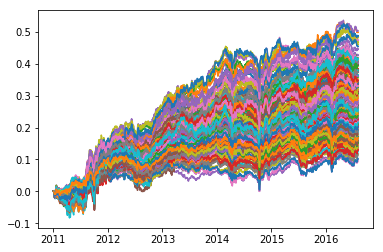

In [23]:
plt.figure()
plt.plot(run1.returns.dropna().cumsum())
plt.show()

In [24]:
comb = CombinationSearch()
comb.add_run(run1)
comb.start(10, 'mean')

  0%|          | 0/1 [00:00<?, ?it/s]

Reading and aggregating runs...


  0%|          | 0/10 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 10/10 [01:03<00:00,  6.09s/it]


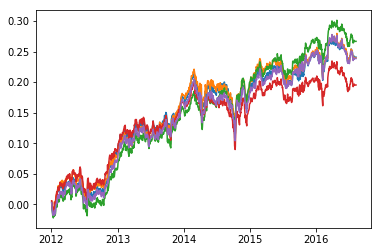

In [25]:
plt.figure()
plt.plot(comb.best_results_rets.dropna().cumsum())
plt.show()

# Analysis of Stats in All Output

In [8]:
run1.import_all_output()

In [32]:
# Exposure columns
expcols = [x for x in run1.all_output.columns if x.find('Exp') > -1]
turncols = [x for x in run1.all_output.columns if x.find('Turnover') > -1]
opencols = [x for x in run1.all_output.columns if x.find('OpenPositions') > -1]
longpl = [x for x in run1.all_output.columns if x.find('LongPL') > -1]
shortpl = [x for x in run1.all_output.columns if x.find('ShortPL') > -1]

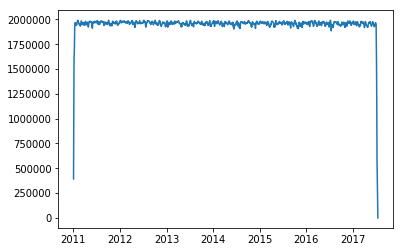

In [36]:
plt.figure()
plt.plot(run1.all_output[expcols].mean(axis=1))
plt.show()

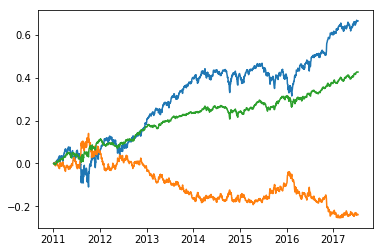

In [34]:
plt.figure()
plt.plot(run1.all_output[longpl].mean(axis=1).cumsum())
plt.plot(run1.all_output[shortpl].mean(axis=1).cumsum())
plt.plot(run1.all_output[longpl].mean(axis=1).cumsum() + run1.all_output[shortpl].mean(axis=1).cumsum())
plt.show()